In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing a CSV file
insurance_df=pd.read_csv('insurance.csv')

In [3]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print(insurance_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [5]:
#checking all the columns if there is any null value
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# making dummy variables to convert string values into binary
# dummy variable for sex
dummy1=pd.get_dummies(insurance_df['sex'])

In [7]:
dummy1.head()

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [8]:
# dummy variable for a person if smoker or not
dummy2=pd.get_dummies(insurance_df['smoker'])

In [9]:
dummy2.head()

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [10]:
# dummy variable for from which region they are
dummy3=pd.get_dummies(insurance_df['region'])

In [11]:
dummy3.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [12]:
# concat all the dummy variavles with dataframe
insurance=pd.concat((insurance_df,dummy1,dummy2,dummy3),axis=1)

In [13]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0


In [14]:
# drop all the columns which contains data in string format
# out of four region columns that we have got from dummy variables we need to drop one of it to avoid dummy variable trap
cols_to_use=['age','bmi','children','charges','male','yes','northeast','northwest','southeast']
insurance=insurance[cols_to_use]

In [15]:
insurance.head()

,age,bmi,children,charges,male,yes,northeast,northwest,southeast
0,19,27.900,0,16884.92400,0,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


In [16]:
#rename male by sex
insurance=insurance.rename(columns={'male':'sex'})

In [17]:
insurance.head()

,age,bmi,children,charges,sex,yes,northeast,northwest,southeast
0,19,27.900,0,16884.92400,0,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


In [18]:
#rename yes by smoker
insurance=insurance.rename(columns={'yes':'smoker'})

In [19]:
insurance.head()

,age,bmi,children,charges,sex,smoker,northeast,northwest,southeast
0,19,27.900,0,16884.92400,0,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


C:\Users\sarve\anaconda3\envs\mlclass\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


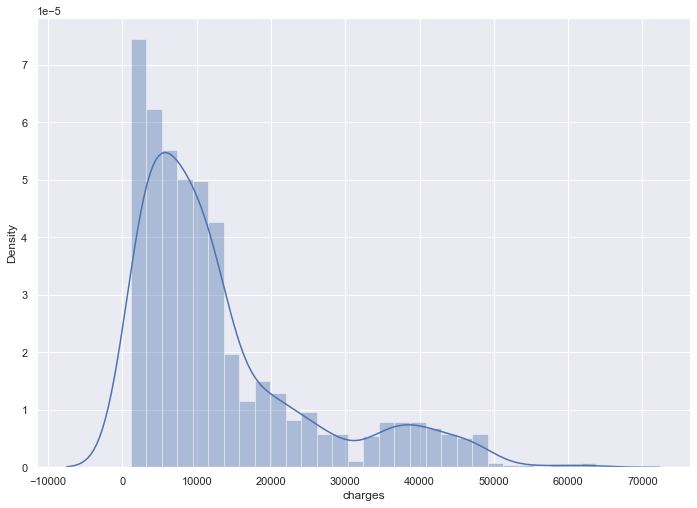

In [20]:
# EDA
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(insurance['charges'], bins=30)
plt.show()

<AxesSubplot:>

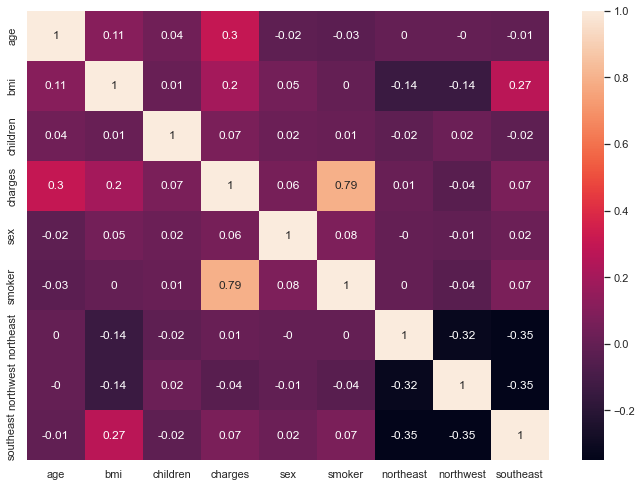

In [21]:
# Correlation Matrix
correlation_matrix = insurance.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [22]:
# Data Preparation
X = insurance.drop('charges',axis=1)
Y = insurance['charges']

In [23]:
# Splitting the dataset into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1070, 8)
(268, 8)
(1070,)
(268,)


In [24]:
# Building the Linear Regression Model
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [25]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
mse = mean_squared_error(Y_train, y_train_predict)
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set:")
print("\n")
print('RMSE is {}'.format(rmse))
print("\n")
print('MSE is {}'.format(mse))
print("\n")
print('R2 score is {}'.format(r2))
print("\n")


The model performance for training set:


RMSE is 6104.593804708963


MSE is 37266065.52049105


R2 score is 0.7430471855293475




In [26]:

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
mse = mean_squared_error(Y_test, y_test_predict)
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set:")
print("\n")
print('RMSE is {}'.format(rmse))
print("\n")
print('MSE is {}'.format(mse))
print("\n")
print('R2 score is {}'.format(r2))
print("\n")

The model performance for testing set:


RMSE is 5803.487605043089


MSE is 33680468.38188878


R2 score is 0.7781096604223829




Text(0, 0.5, 'y_pred')

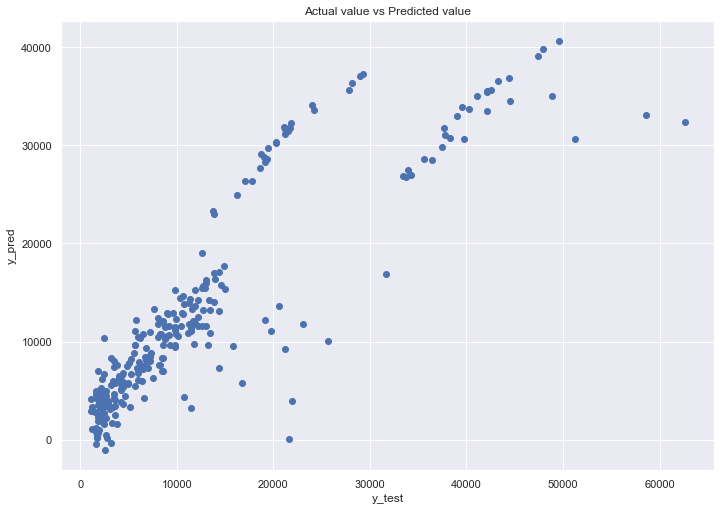

In [30]:
plt.scatter(Y_test,y_test_predict)
plt.title("Actual value vs Predicted value")
plt.xlabel('y_test')
plt.ylabel('y_pred')